In [1]:
from model import *
from data import *
from PIL import Image

Using TensorFlow backend.
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packag

## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator for Masks

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'/data/spacenet/road/AllTrain','PAN-8BIT','PAN-GT',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/home/dspuser/UNET_Road_ID/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)



Epoch 1/5Found 2773 images belonging to 1 classes.

Found 2773 images belonging to 1 classes.
2000/2000 [==============================] - 149s 75ms/step - loss: 0.1588 - accuracy: 0.9566

Epoch 00001: loss improved from inf to 0.15877, saving model to unet_membrane.hdf5
Epoch 2/5
2000/2000 [==============================] - 146s 73ms/step - loss: 0.1245 - accuracy: 0.9576

Epoch 00002: loss improved from 0.15877 to 0.12446, saving model to unet_membrane.hdf5
Epoch 3/5
2000/2000 [==============================] - 146s 73ms/step - loss: 0.1161 - accuracy: 0.9611

Epoch 00003: loss improved from 0.12446 to 0.11609, saving model to unet_membrane.hdf5
Epoch 4/5
2000/2000 [==============================] - 146s 73ms/step - loss: 0.1124 - accuracy: 0.9616

Epoch 00004: loss improved from 0.11609 to 0.11245, saving model to unet_membrane.hdf5
Epoch 5/5
2000/2000 [==============================] - 146s 73ms/step - loss: 0.1074 - accuracy: 0.9622

Epoch 00005: loss improved from 0.11245 to 0.1

### test your model and save predicted results

In [3]:
testGene = testGenerator("data/membrane/test")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)

C:\Users\xuhaozhi\Documents\Study\unet\model.py:34: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge6 = merge([drop4,up6], mode = 'concat', concat_axis = 3)
C:\SoftWare\Anaconda2\envs\python3\lib\site-packages\keras\legacy\layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
C:\Users\xuhaozhi\Documents\Study\unet\model.py:39: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge7 = merge([conv3,up7], mode = 'concat', concat_axis = 3)
C:\Users\xuhaozhi\Documents\Study\unet\model.py:44: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `

 1/30 [>.............................] - ETA: 4s

C:\SoftWare\Anaconda2\envs\python3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\SoftWare\Anaconda2\envs\python3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


30/30 [==============================] - 1s 47ms/step


C:\SoftWare\Anaconda2\envs\python3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


### Train with generator Ground Truths

In [3]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'/data/spacenet/road/AllTrain','PAN-GT','PAN-GT',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_masks_for_GT.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

Found 2773 images belonging to 1 classes.
Epoch 1/5
Found 2773 images belonging to 1 classes.
2000/2000 [==============================] - 144s 72ms/step - loss: 0.0390 - accuracy: 0.9924

Epoch 00001: loss improved from inf to 0.03897, saving model to unet_masks_for_GT.hdf5
Epoch 2/5
2000/2000 [==============================] - 145s 72ms/step - loss: 0.0273 - accuracy: 0.9991

Epoch 00002: loss improved from 0.03897 to 0.02727, saving model to unet_masks_for_GT.hdf5
Epoch 3/5
2000/2000 [==============================] - 145s 73ms/step - loss: 0.0238 - accuracy: 0.9994

Epoch 00003: loss improved from 0.02727 to 0.02380, saving model to unet_masks_for_GT.hdf5
Epoch 4/5
2000/2000 [==============================] - 145s 73ms/step - loss: 0.0208 - accuracy: 0.9996

Epoch 00004: loss improved from 0.02380 to 0.02085, saving model to unet_masks_for_GT.hdf5
Epoch 5/5
2000/2000 [==============================] - 145s 73ms/step - loss: 0.0181 - accuracy: 0.9996

Epoch 00005: loss improved from

# Load Weights from before

In [62]:
model = unet()
model.load_weights("unet_alltrainRoad.hdf5")

# Plot a test image

In [18]:
def predImgGen(imgPath, target_size=(256,256)):
    img = io.imread(imgPath,as_gray = True)
    img = img / 255
    img = trans.resize(img,target_size)
    img = np.reshape(img,img.shape+(1,))
    img = np.reshape(img,(1,)+img.shape)
    return img

In [20]:
PANImgPath = '/data/spacenet/road/AOI_5_Khartoum_Roads_Test_Public/PAN-PNG/PAN_AOI_5_Khartoum_img215.png'
testImg = predImgGen(PANImgPath)

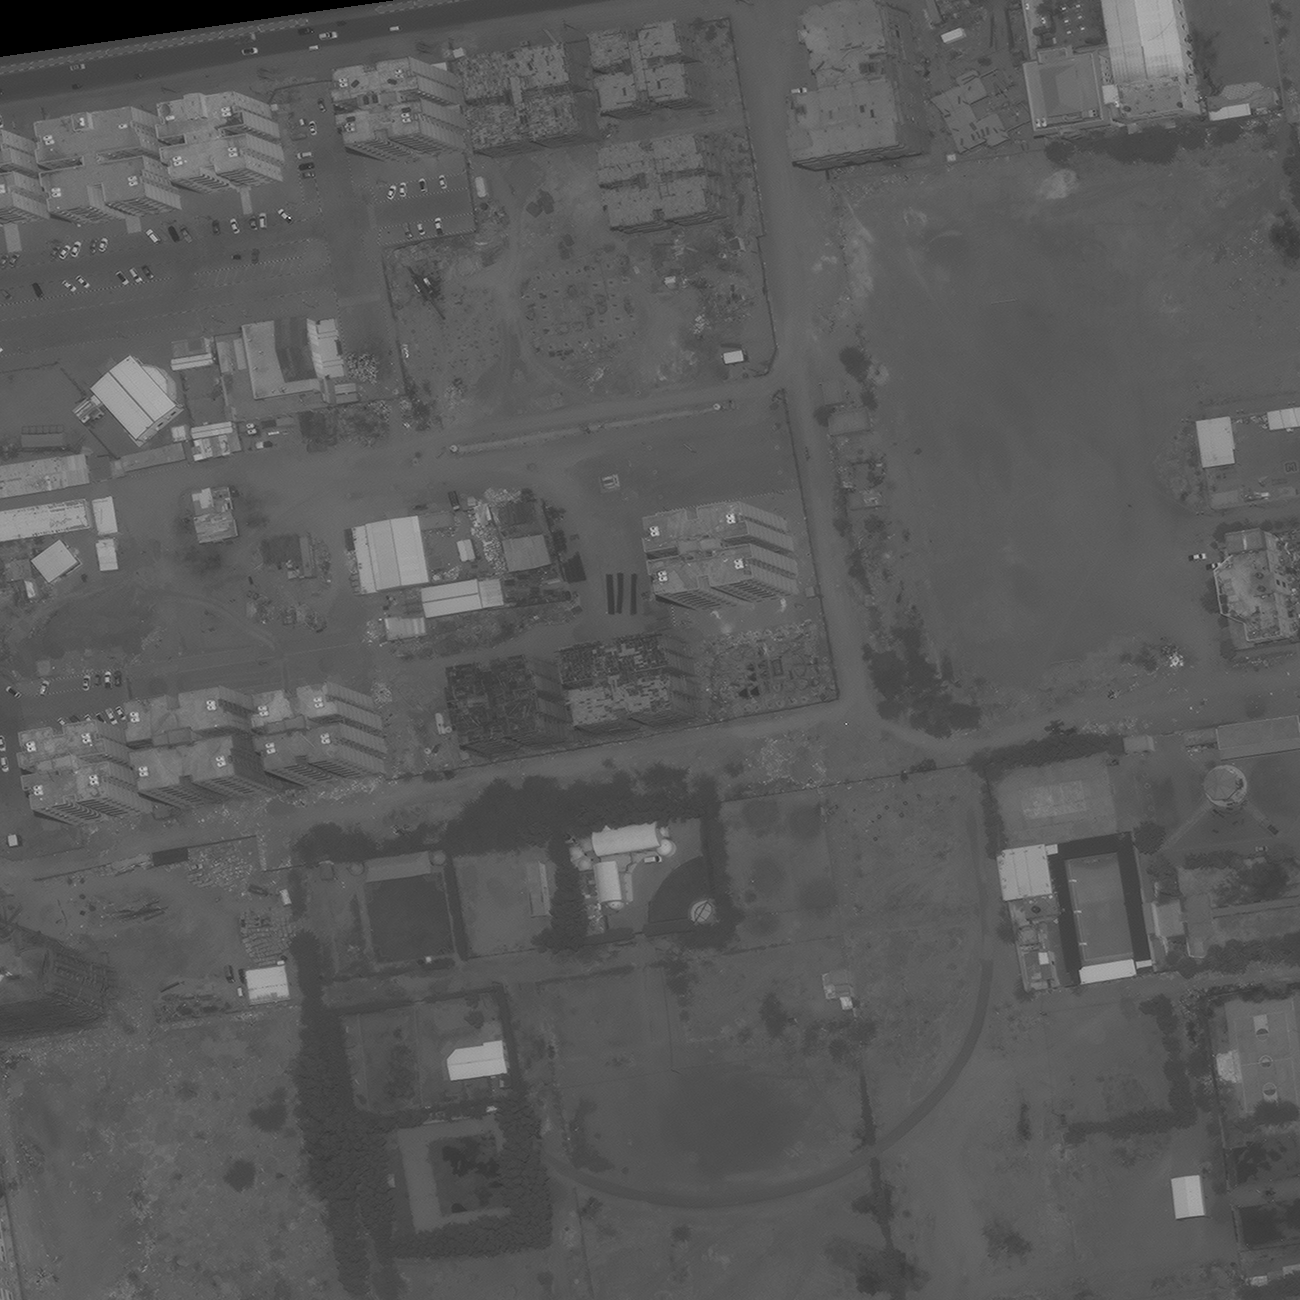

In [27]:
Image.open(PANImgPath)

## Predict Test Image

In [63]:
pred = model.predict(testImg)

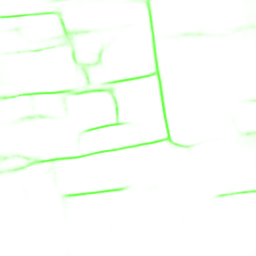

In [69]:
maskArr = pred.reshape(256,256)

maskArrThresh = np.zeros((maskArr.shape[0], maskArr.shape[1], 4))
for row in range(0, maskArr.shape[0]):
    for col in range(0, maskArr.shape[1]):
        #if maskarr[row, col] < 0.: 
        maskArrThresh[row, col, 0] = 50 
        maskArrThresh[row, col, 1] = 255 
        maskArrThresh[row, col, 2] = 0 
        maskArrThresh[row, col, 3] = int(maskArr[row, col] * 255)
        #else: #maskArrThresh[row, col, 0:3] = 255 # maskArrThresh[row, col, 3] = 0

maskArrThresh = maskArrThresh.astype("uint8")
maskImg = Image.fromarray(maskArrThresh, 'RGBA')
maskImg

In [70]:
predRe = pred.reshape(256,256)
        
PANImg = Image.open(PANImgPath)
PANImgT = PANImg.convert('RGBA')
        
PANDim = (PANImgT.width, PANImgT.height)
maskImgRe = maskImg.resize(PANDim) 
        
comp = Image.alpha_composite(PANImgT, maskImgRe)

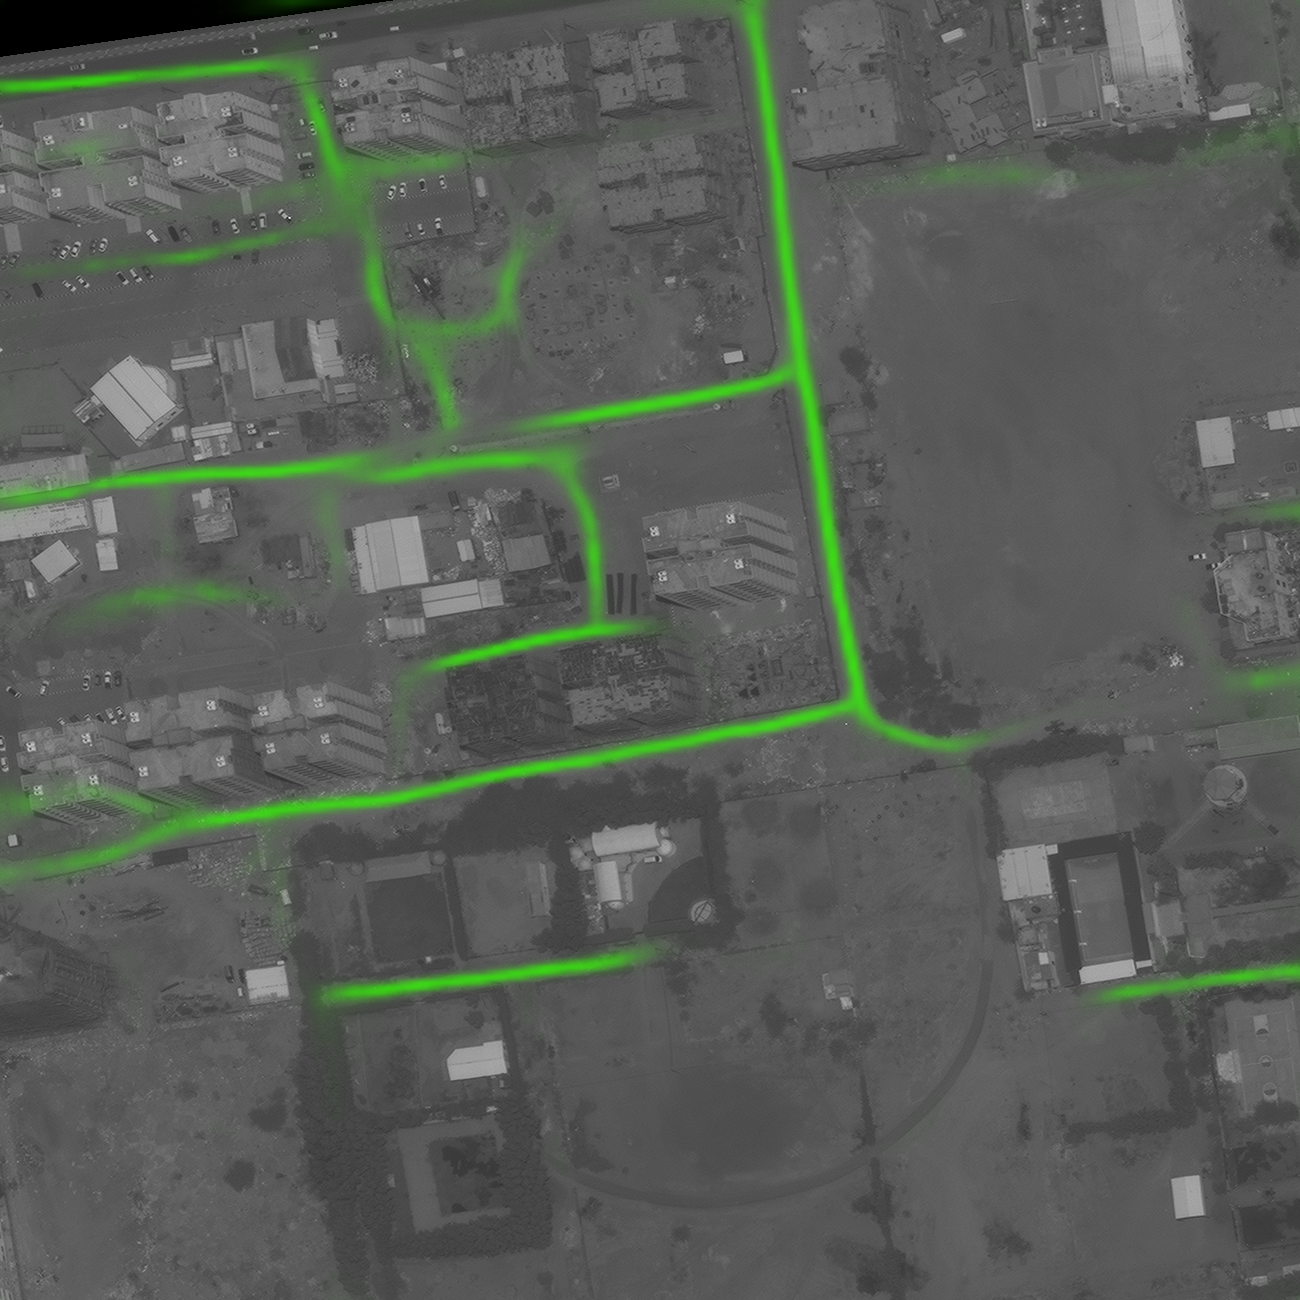

In [71]:
comp

## Using UNET for connecting masks

In [4]:
model_masks = unet()
model_masks.load_weights("unet_masks_for_GT.hdf5")

In [13]:
GTImgPath = '/data/spacenet/road/AllTrain/PAN-GT/SN3_roads_train_AOI_2_Vegas_PAN_img1037.tif'

In [14]:
GTImg = Image.open(GTImgPath)

In [59]:
np.array(GTImg)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [150, 150, 150, ...,   0,   0,   0],
       [150, 150, 150, ...,   0,   0,   0],
       [150, 150, 150, ...,   0,   0,   0]], dtype=uint8)

In [43]:
np.array(maskImg)

array([[[ 50, 255,   0,  39],
        [ 50, 255,   0,  27],
        [ 50, 255,   0,  20],
        ...,
        [ 50, 255,   0,  10],
        [ 50, 255,   0,  14],
        [ 50, 255,   0,  30]],

       [[ 50, 255,   0,  21],
        [ 50, 255,   0,  16],
        [ 50, 255,   0,  12],
        ...,
        [ 50, 255,   0,   8],
        [ 50, 255,   0,   6],
        [ 50, 255,   0,  11]],

       [[ 50, 255,   0,  12],
        [ 50, 255,   0,  10],
        [ 50, 255,   0,   8],
        ...,
        [ 50, 255,   0,   8],
        [ 50, 255,   0,   6],
        [ 50, 255,   0,   8]],

       ...,

       [[ 50, 255,   0,   4],
        [ 50, 255,   0,   2],
        [ 50, 255,   0,   1],
        ...,
        [ 50, 255,   0,   6],
        [ 50, 255,   0,   5],
        [ 50, 255,   0,   7]],

       [[ 50, 255,   0,   5],
        [ 50, 255,   0,   2],
        [ 50, 255,   0,   1],
        ...,
        [ 50, 255,   0,   6],
        [ 50, 255,   0,   6],
        [ 50, 255,   0,  10]],

       [[ 50

In [72]:
model_masks.predict(np.array(GTImg))

ValueError: Error when checking input: expected input_3 to have 4 dimensions, but got array with shape (1300, 1300)

array([[[ 50, 255,   0,  39],
        [ 50, 255,   0,  27],
        [ 50, 255,   0,  20],
        ...,
        [ 50, 255,   0,  10],
        [ 50, 255,   0,  14],
        [ 50, 255,   0,  30]],

       [[ 50, 255,   0,  21],
        [ 50, 255,   0,  16],
        [ 50, 255,   0,  12],
        ...,
        [ 50, 255,   0,   8],
        [ 50, 255,   0,   6],
        [ 50, 255,   0,  11]],

       [[ 50, 255,   0,  12],
        [ 50, 255,   0,  10],
        [ 50, 255,   0,   8],
        ...,
        [ 50, 255,   0,   8],
        [ 50, 255,   0,   6],
        [ 50, 255,   0,   8]],

       ...,

       [[ 50, 255,   0,   4],
        [ 50, 255,   0,   2],
        [ 50, 255,   0,   1],
        ...,
        [ 50, 255,   0,   6],
        [ 50, 255,   0,   5],
        [ 50, 255,   0,   7]],

       [[ 50, 255,   0,   5],
        [ 50, 255,   0,   2],
        [ 50, 255,   0,   1],
        ...,
        [ 50, 255,   0,   6],
        [ 50, 255,   0,   6],
        [ 50, 255,   0,  10]],

       [[ 50